In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import datetime

In [2]:
cities = ['Milano']
#cities = [
#    'Bologna',
#    
#    
#    
#    'Firenze',
#    'Genova',
#    'Milano',
#    'Napoli',
#    'Palermo',
#    'Torino',
#    'Roma',
#]

list_ = []
for city in cities:
    filename = 'data/generated_files/immobiliare/immobiliare_{}_05_2018.csv'.format(city)
    temp_df = pd.read_csv(filename, index_col=None, header=0)
    list_.append(temp_df)
df = pd.concat(list_)
df = df.reset_index(drop=True)
df.head()

,additionalCharacteristics,area,catasto,climax,condition,constructionYear,energyClass,expensesCondominium,expensesHeating,floorNumber,...,idListing,lat,location,lon,name,placeType,price,propertyType,rooms,url
0,"Balcone,Portiere intera giornata,Cancello elet...",100.0,"Classe A/3, rendita € 881",Assente,Da ristrutturare,1960.0,G,250/mese,NaN,"2° di 8 piani, con ascensore",...,L15 - 16/04/2018,45.4915,NaN,9.20480,"Trilocale viale Lunigiana 15, Milano",Appartamento,315.000,"Intera proprietà, classe immobile signorile","3 (2 camere da letto, 1 altro), 1 bagno, cucin...",NaN
1,"Balcone,Portiere intera giornata,Cancello elet...",154.0,"Classe A/2, rendita € 800","Autonomo, solo freddo",Ottimo/Ristrutturato,1900.0,G,375/mese,NaN,"3° di 5 piani, con ascensore",...,T3141I (2210493) - 09/05/2018,45.4831,NaN,9.21433,"Trilocale via Nicola Piccinni, Milano",Appartamento,960.000,"Intera proprietà, classe immobile signorile","3 (2 camere da letto, 1 altro), 2 bagni, cucin...",NaN
2,"Balcone,Portiere intera giornata,Cancello elet...",100.0,"Classe A/3, rendita € 1.444","Autonomo, freddo/caldo",Ottimo/Ristrutturato,1950.0,A1,260/mese,NaN,"2° di 10 piani, con ascensore",...,SR_FS - 28/04/2018,45.4808,NaN,9.19760,"Trilocale viale Ferdinando di Savoia 5, Milano",Appartamento,845.000,"Intera proprietà, classe immobile signorile","3 (2 camere da letto, 1 altro), 2 bagni, cucin...",NaN
3,"Portiere mezza giornata,Fibra ottica,Porta bli...",95.0,"Classe A/3, rendita € 370","Autonomo, freddo/caldo",Ottimo/Ristrutturato,1920.0,G,141/mese,NaN,4° di 4 piani,...,vale2 - 28/04/2018,45.4508,NaN,9.21280,"Trilocale viale Umbria, Milano",Appartamento,470.000,"Intera proprietà, classe immobile media","3 (2 camere da letto, 1 altro), 2 bagni, cucin...",NaN
4,"Balcone,Portiere intera giornata,Fibra ottica,...",130.0,"Classe A/3, rendita € 1.100",Predisposizione impianto,Buono / Abitabile,1960.0,E,500/mese,NaN,"1° di 5 piani, con ascensore",...,PAO26 - 23/04/2018,45.4570,NaN,9.20810,"Quadrilocale via Bergamo 11, Milano",Appartamento,595.000,"Intera proprietà, classe immobile signorile","4 (3 camere da letto, 1 altro), 2 bagni, cucin...",NaN


In [3]:
df.columns

Index(['additionalCharacteristics', 'area', 'catasto', 'climax', 'condition',
       'constructionYear', 'energyClass', 'expensesCondominium',
       'expensesHeating', 'floorNumber', 'garage', 'heating', 'idListing',
       'lat', 'location', 'lon', 'name', 'placeType', 'price', 'propertyType',
       'rooms', 'url'],
      dtype='object')

In [4]:
df = df.dropna(subset=['area'])
df['date_listing'] = pd.to_datetime(df['idListing'].str.split('-').str[-1].str.strip(), format='%d/%m/%Y', errors='ignore')
df = df[df['price'] != 'richiesta']
df = df[df['area'] > 15]
df = df[df['placeType'].isin(('Appartamento', 'Attico / Mansarda', 'Casa indipendente', 'Loft / Open Space', 'Villetta a schiera'))]
df = df[df['condition'] != 'Nuovo / In costruzione']
df.describe()

,area,constructionYear,lat,lon,url
count,12457.000000,9838.000000,11967.000000,11967.000000,0.0
mean,112.887934,1954.030087,45.467533,9.192459,NaN
std,76.432349,46.475607,0.730540,1.293801,NaN
min,16.000000,1040.000000,-34.397000,9.061900,NaN
25%,65.000000,1940.000000,45.456600,9.150490,NaN
50%,90.000000,1960.000000,45.472800,9.182200,NaN
75%,140.000000,1970.000000,45.493500,9.213800,NaN
max,960.000000,2019.000000,45.533300,150.644000,NaN


In [5]:
df.groupby(df['date_listing'].dt.year).count()

,additionalCharacteristics,area,catasto,climax,condition,constructionYear,energyClass,expensesCondominium,expensesHeating,floorNumber,...,lat,location,lon,name,placeType,price,propertyType,rooms,url,date_listing
date_listing,,,,,,,,,,,,,,,,,,,,,
2013,1,1,0,1,1,0,1,0,0,1,...,1,0,1,1,1,1,0,1,0,1
2014,4,4,0,2,4,4,4,4,0,4,...,4,0,4,4,4,4,4,4,0,4
2015,28,31,0,23,25,20,28,21,0,31,...,30,1,30,31,31,31,27,31,0,31
2016,122,131,38,88,119,93,119,82,4,126,...,126,5,126,131,131,131,110,128,0,131
2017,1281,1307,623,1070,1230,1025,1156,1032,118,1238,...,1238,69,1238,1307,1307,1307,1208,1301,0,1307
2018,10743,10983,6096,9514,10424,8696,9787,9011,1265,10520,...,10568,415,10568,10983,10983,10983,10216,10941,0,10983


In [6]:
df = df[df['date_listing'] >= datetime.datetime(2017,5,10)]

df.describe()

,area,constructionYear,lat,lon,url
count,12095.000000,9572.000000,11623.000000,11623.000000,0.0
mean,112.348574,1953.855516,45.467263,9.192987,NaN
std,75.710354,46.579093,0.741258,1.312785,NaN
min,16.000000,1040.000000,-34.397000,9.061900,NaN
25%,65.000000,1940.000000,45.456600,9.150600,NaN
50%,90.000000,1960.000000,45.472700,9.182400,NaN
75%,138.000000,1970.000000,45.493400,9.214000,NaN
max,960.000000,2019.000000,45.533300,150.644000,NaN


## Pre-processing

In [7]:
df.loc[:, 'price'] = df['price'].str.replace('.', '')
df['price'] = df['price'].astype(np.float32)

df = df[df['price'] > 20000]
df = df[df['price'] < 20000000]

In [8]:
def extract_property_class(x):
    #'Diritto di superficie',
    #'Diritto di superficie, classe immobile economica',
    x = str(x)
    f = x.split(',')
    return f[-1].strip() if 'classe' in f[-1] or len(f) == 2 else np.nan

def extract_property_type(x):
    #'Diritto di superficie',
    #'Diritto di superficie, classe immobile economica',
    x = str(x)
    f = x.split(',')
    return f[0].strip()


df['propertyType'] = df['propertyType'].str.lower()
df['property_class'] = df['propertyType'].apply(lambda x: extract_property_class(x))
df['propertyType'] = df['propertyType'].apply(lambda x: extract_property_type(x))

df.loc[df['property_class'] == 'classe immobile economica', 'property_class'] = 0
df.loc[df['property_class'] == 'classe immobile media', 'property_class'] = 1
df.loc[df['property_class'] == 'classe immobile signorile', 'property_class'] = 2
df.loc[df['property_class'] == 'immobile di lusso', 'property_class'] = 2

df['property_type'] = np.nan
df.loc[df['propertyType'] == 'nuda proprietà', 'property_type'] = 4
df.loc[df['propertyType'] == 'usufrutto', 'property_type'] = 3
df.loc[df['propertyType'] == 'parziale proprietà', 'property_type'] = 2
df.loc[df['propertyType'] == 'diritto di superficie', 'property_type'] = 5
df.loc[df['propertyType'] == 'intera proprietà', 'property_type'] = 1

In [9]:
df = df[df.property_type == 1]

In [10]:
df.loc[:, 'garage'] = df['garage'].apply(lambda x: 1 if 'Box' in str(x) else 0)

In [11]:
def process_land_value(x):
    x = str(x)
    f = x.split(',')
    
    if 'rendita' in f[-1]:
        return f[-1].split(' ')[-1]
    
    return np.nan

df['land_value'] = df['catasto'].str.lower().apply(lambda x: process_land_value(x)).str.replace('.', '').astype(np.float32)

In [12]:
df.loc[:, 'energyClass'] = df['energyClass'].str[:2].str.replace(',', '')
set_energies = {
    'A+':4, 'A':5, 'A1':3, 'A2':2, 'A3':1, 'A4':0, 'B':6, 'C':7, 'D':8, 'E':9, 'F':10, 'G':11, 'No': np.nan
}
for k,v in set_energies.items():
    df.loc[df['energyClass'] == k, 'energyClass'] = v
df['energyClass'] = df['energyClass'].apply(pd.to_numeric, errors='coerce')

In [13]:
df_rooms = df.rooms.str.extract(r"(?:(?P<locali>\d+\+?)(?: (?:local\w(?:\, )?)| \())?(?:(?P<camere>\d+\+?)(?: cam[\w ]+(?:\, )?))?(?:(?P<altro>\d+\+?)(?: altr[\w]+)\)?(?:\, )?)?(?:(?P<bagni>\d+\+?)(?: bagn[\w]+(?:\, )?))?(?:(?:[Cc]ucin)(?P<cucina>[\w ]+))?", expand=True)
df_rooms = pd.get_dummies(df_rooms, columns=['cucina'])
df_rooms.loc[df_rooms.locali.notnull() & df_rooms.locali.str.contains('+', na='', regex=False), 'locali'] = df_rooms.loc[df_rooms.locali.notnull() & df_rooms.locali.str.contains('+', na='', regex=False), 'locali'].str.replace('+', '').astype(np.float32)+1
df_rooms.loc[df_rooms.bagni.notnull() & df_rooms.bagni.str.contains('+', na='', regex=False), 'bagni'] = df_rooms.loc[df_rooms.bagni.notnull() & df_rooms.bagni.str.contains('+', na='', regex=False), 'bagni'].str.replace('+', '').astype(np.float32)+1
df_rooms.loc[df_rooms.altro.notnull() & df_rooms.altro.str.contains('+', na='', regex=False), 'altro'] = df_rooms.loc[df_rooms.altro.notnull() & df_rooms.altro.str.contains('+', na='', regex=False), 'altro'].str.replace('+', '').astype(np.float32)+1
df = pd.concat((df, df_rooms), axis=1)

df['camere'] = df['camere'].astype(np.float32)
df = df[df['camere'] < 100]
df_rooms.head()

,locali,camere,altro,bagni,cucina_a a vista,cucina_a abitabile,cucina_a angolo cottura,cucina_a semi abitabile,cucina_otto
0,3,2,1,1,0,0,0,1,0
1,3,2,1,2,0,1,0,0,0
2,3,2,1,2,0,0,1,0,0
3,3,2,1,2,1,0,0,0,0
4,4,3,1,2,0,1,0,0,0


In [14]:
df = pd.get_dummies(df, columns=['condition'])
df = pd.get_dummies(df, columns=['placeType'])

In [15]:
df['additionalCharacteristics'] = df['additionalCharacteristics'].fillna("")
df['additionalCharacteristics'] = df['additionalCharacteristics'].str.split(',')
df['additionalCharacteristics'] = df['additionalCharacteristics'].map(lambda x: ','.join(sorted(x))).str.split(',')

characteristics = set()

for row in df['additionalCharacteristics'].values:
    characteristics = characteristics.union(set(row))

In [16]:
list_columns = [x for x in characteristics if len(x) > 2]
list_columns

['Esposizione doppia',
 'Taverna',
 'Cancello elettrico',
 'Idromassaggio',
 'Cantina',
 'Esposizione esterna',
 'Camino',
 'Impianto tv centralizzato',
 'Giardino comune',
 'Parzialmente arredato',
 'Impianto tv singolo',
 'Portiere mezza giornata',
 'Balcone',
 'Esposizione interna',
 'Fibra ottica',
 'Arredato',
 'Infissi esterni in doppio vetro / legno',
 'Infissi esterni in vetro / metallo',
 'Terrazzo',
 'Porta blindata',
 'Piscina',
 'Giardino privato',
 'Infissi esterni in triplo vetro / pvc',
 'Portiere intera giornata',
 'Impianto allarme',
 'Campo da tennis',
 'Mansarda',
 'Infissi esterni in triplo vetro / metallo',
 'Infissi esterni in vetro / pvc',
 'Impianto tv con parabola satellitare',
 'Infissi esterni in doppio vetro / metallo',
 'Infissi esterni in vetro / legno',
 'Infissi esterni in triplo vetro / legno',
 'Videocitofono',
 'Infissi esterni in doppio vetro / pvc']

In [17]:
characteristics_table = {
    'Infissi esterni in vetro / legno': 0,
    'Infissi esterni in vetro / pvc': 1,
    'Infissi esterni in vetro / metallo': 2,
    'Infissi esterni in doppio vetro / legno': 3,
    'Infissi esterni in doppio vetro / pvc': 4,
    'Infissi esterni in doppio vetro / metallo': 5,
    'Infissi esterni in triplo vetro / legno': 6,
    'Infissi esterni in triplo vetro / pvc': 7,
    'Infissi esterni in triplo vetro / metallo': 8,
}

portiere_table = {
    'Portiere intera giornata':2,
    'Portiere mezza giornata':1
}

esposizione_table = {
    'Esposizione doppia':3,
    'Esposizione esterna':2,
    'Esposizione interna':1
}

tv_table = {
    'Impianto tv con parabola satellitare':2,
    'Impianto tv singolo': 1,
    'Impianto tv centralizzato':0
}

arredato_table = {
    'Arredato':2,
    'Parzialmente arredato': 1
}

giardino_table = {
    'Giardino comune': 1,
    'Giardino privato': 2
}

cucina_table = {
    'cucina_a angolo cottura': 1,
    'cucina_otto': 1,
    'cucina_a a vista': 2,
    'cucina_a semi abitabile': 3,
    'cucina_a abitabile': 4,
}

condition_table = {
    #'condition_Nuovo / In costruzione': 0,
    'condition_Da ristrutturare': 1,
    'condition_Buono / Abitabile': 2,
    'condition_Ottimo/Ristrutturato': 3
}

In [18]:
df = df.drop('additionalCharacteristics', 1).join(
    pd.get_dummies(
        pd.DataFrame(df.additionalCharacteristics.tolist()).stack()
    ).astype(int).sum(level=0)
)
        
df['infissi'] = np.nan
df['portiere'] = 0
df['giardino'] = 0
df['arredato'] = 0
df['esposizione'] = np.nan
df['tv'] = np.nan
df['kitchen'] = np.nan
df['condition'] = np.nan
df['class'] = np.nan
df['type'] = np.nan
for x in characteristics_table.keys():
    df.loc[df[x] == 1, 'infissi'] = characteristics_table[x]
for x in portiere_table.keys():
    df.loc[df[x] == 1, 'portiere'] = portiere_table[x]
for x in giardino_table.keys():
    df.loc[df[x] == 1, 'giardino'] = giardino_table[x]
for x in arredato_table.keys():
    df.loc[df[x] == 1, 'arredato'] = arredato_table[x]
for x in esposizione_table.keys():
    df.loc[df[x] == 1, 'esposizione'] = esposizione_table[x]
for x in tv_table.keys():
    df.loc[df[x] == 1, 'tv'] = tv_table[x]
for x in condition_table.keys():
    df.loc[df[x] == 1, 'condition'] = condition_table[x]
    
for x in cucina_table.keys():
    df.loc[df[x] == 1, 'kitchen'] = cucina_table[x]

df.describe()


,area,constructionYear,energyClass,garage,lat,lon,price,url,property_type,land_value,...,infissi,portiere,giardino,arredato,esposizione,tv,kitchen,condition,class,type
count,9036.000000,7829.000000,8217.000000,9036.000000,8822.000000,8822.000000,9.036000e+03,0.0,9036.0,3.660000e+03,...,4424.000000,9036.000000,9036.000000,9036.000000,5250.000000,4824.000000,8794.000000,8757.000000,0.0,0.0
mean,112.982404,1954.401839,10.053061,0.247897,45.474732,9.180430,4.942446e+05,NaN,1.0,2.751119e+05,...,2.944394,0.635015,0.362107,0.322820,2.470095,0.146766,2.925290,2.363024,NaN,NaN
std,73.514269,45.701280,1.437130,0.431816,0.024301,0.040910,6.157360e+05,NaN,0.0,1.652946e+07,...,1.888021,0.897656,0.543329,0.639706,0.802193,0.454455,1.235396,0.700368,NaN,NaN
min,18.000000,1117.000000,0.000000,0.000000,45.400200,9.061900,3.300000e+04,NaN,1.0,1.000000e+00,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,NaN,NaN
25%,65.000000,1940.000000,10.000000,0.000000,45.456900,9.149892,1.740000e+05,NaN,1.0,3.820000e+02,...,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,2.000000,NaN,NaN
50%,92.000000,1960.000000,11.000000,0.000000,45.473100,9.181900,2.980000e+05,NaN,1.0,6.150000e+02,...,3.000000,0.000000,0.000000,0.000000,3.000000,0.000000,4.000000,2.000000,NaN,NaN
75%,139.000000,1970.000000,11.000000,0.000000,45.493900,9.214000,5.900000e+05,NaN,1.0,1.041000e+03,...,5.000000,2.000000,1.000000,0.000000,3.000000,0.000000,4.000000,3.000000,NaN,NaN
max,960.000000,2019.000000,11.000000,1.000000,45.533300,9.267140,1.500000e+07,NaN,1.0,1.000000e+09,...,8.000000,2.000000,2.000000,2.000000,3.000000,2.000000,4.000000,3.000000,NaN,NaN


In [19]:
df.loc[df['expensesCondominium'].str.len() <= 1] = np.nan
df.loc[df['expensesCondominium'].str.len() > 1, 'expensesCondominium'] = df[df['expensesCondominium'].str.len() > 1]['expensesCondominium'].str.split('/', expand=True)[0]
df.loc[:, 'expensesCondominium'] = df['expensesCondominium'].str.replace('.', '')
df.head()

,area,catasto,climax,constructionYear,energyClass,expensesCondominium,expensesHeating,floorNumber,garage,heating,...,infissi,portiere,giardino,arredato,esposizione,tv,kitchen,condition,class,type
0,100.0,"Classe A/3, rendita € 881",Assente,1960.0,11.0,250,NaN,"2° di 8 piani, con ascensore",0.0,"Centralizzato, a pavimento, alimentato a metano",...,1.0,2.0,0.0,0.0,3.0,0.0,3.0,1.0,NaN,NaN
1,154.0,"Classe A/2, rendita € 800","Autonomo, solo freddo",1900.0,11.0,375,NaN,"3° di 5 piani, con ascensore",0.0,"Centralizzato, a radiatori, alimentato a metano",...,5.0,2.0,0.0,0.0,2.0,0.0,4.0,3.0,NaN,NaN
2,100.0,"Classe A/3, rendita € 1.444","Autonomo, freddo/caldo",1950.0,3.0,260,NaN,"2° di 10 piani, con ascensore",0.0,"Centralizzato, a radiatori, alimentato a metano",...,5.0,2.0,0.0,2.0,3.0,0.0,1.0,3.0,NaN,NaN
3,95.0,"Classe A/3, rendita € 370","Autonomo, freddo/caldo",1920.0,11.0,141,NaN,4° di 4 piani,0.0,"Autonomo, a radiatori, alimentato a metano",...,4.0,1.0,0.0,1.0,3.0,2.0,2.0,3.0,NaN,NaN
4,130.0,"Classe A/3, rendita € 1.100",Predisposizione impianto,1960.0,9.0,500,NaN,"1° di 5 piani, con ascensore",0.0,"Centralizzato, a radiatori, alimentato a metano",...,3.0,2.0,1.0,0.0,3.0,0.0,4.0,2.0,NaN,NaN


In [20]:
'''
{'A radiatori',
 'Alimentato a fotovoltaico',
 'Alimentato a metano',
 'Assente', 0
 'Autonomo', 2
 'Centralizzato'} 1
'''

df['newHeating'] = np.nan
df.loc[(~df.heating.isnull()) & (df.heating.str.contains('Assente')), 'newHeating'] = 0
df.loc[(~df.heating.isnull()) & (df.heating.str.contains('Assente')), 'Centralizzato'] = 1
df.loc[(~df.heating.isnull()) & (df.heating.str.contains('Autonomo')), 'newHeating'] = 2
df.loc[(~df.heating.isnull()) & (df.heating.str.contains('Alimentato a metano')), 'newHeating'] = 2
df.loc[(~df.heating.isnull()) & (df.heating.str.contains('Alimentato a fotovoltaico')), 'newHeating'] = 2
df.loc[(~df.heating.isnull()) & (df.heating.str.contains('A radiatori')), 'newHeating'] = 2

In [21]:
# Interrato
# Seminterrato
# Piano rialzato - Ammezzato
# Piano terra
# 1°
# Su più livelli
# altro

# ascensore

df['newFloorNumber'] = np.nan
df.loc[(~df.floorNumber.isnull()), 'newFloorNumber'] = 6
df.loc[(~df.floorNumber.isnull()) & (df.floorNumber.str.contains('Interrato')), 'newFloorNumber'] = 0
df.loc[(~df.floorNumber.isnull()) & (df.floorNumber.str.contains('Seminterrato')), 'newFloorNumber'] = 1
df.loc[(~df.floorNumber.isnull()) & ((df.floorNumber.str.contains('Piano rialzato')) | (df.floorNumber.str.contains('Ammezzato'))), 'newFloorNumber'] = 2
df.loc[(~df.floorNumber.isnull()) & (df.floorNumber.str.contains('Piano terra')), 'newFloorNumber'] = 3
df.loc[(~df.floorNumber.isnull()) & (df.floorNumber.str.contains('1°')), 'newFloorNumber'] = 4
df.loc[(~df.floorNumber.isnull()) & (df.floorNumber.str.contains('livelli')), 'newFloorNumber'] = 5

# ascensore
df['ascensore'] = np.nan
df.loc[(~df.floorNumber.isnull()) & (df.floorNumber.str.contains('con ascensore')), 'ascensore'] = 1

In [22]:
df = df.rename(columns={'area': 'sqmt'})
df['has_terrace'] = df[['Balcone', 'Terrazzo']].head(10).sum(1)
    
# Default values
df.loc[df['Mansarda'].isnull(), 'Mansarda'] = 0
df.loc[df['Idromassaggio'].isnull(), 'Idromassaggio'] = 0
df.loc[df['Camino'].isnull(), 'Camino'] = 0
df.loc[df['locali'].isnull(), 'locali'] = df.loc[df['locali'].isnull(), ['altro', 'camere', 'bagni']].fillna(0).sum(1) + (df.loc[df['locali'].isnull(), 'kitchen'].fillna(0) >= 3).astype(int)

In [23]:
columns = ['sqmt', 
           'constructionYear', 'energyClass', 'expensesCondominium', 'price',
           'newFloorNumber', 'newHeating', 'portiere', 'infissi', 'giardino', 'tv', 'arredato', 'esposizione', 'kitchen',
           'condition', 'land_value',
           
       'Piscina', 
       'Idromassaggio',
       'Mansarda',
       'Cantina',
           'Camino',
       'has_terrace', 'garage', 
          
           'placeType_Appartamento', 'placeType_Attico / Mansarda',
       'placeType_Casa indipendente', 'placeType_Loft / Open Space',
       'placeType_Villetta a schiera', 
           'property_class', 'property_type',
           
           'locali', 'camere', 'altro', 'bagni', 
           
          ]
pd.set_option("display.precision", 8)
df[columns] = df[columns].astype(np.float32)
df[columns].describe()
#df[['area','constructionYear','price']].describe()

,sqmt,constructionYear,energyClass,expensesCondominium,price,newFloorNumber,newHeating,portiere,infissi,giardino,...,placeType_Attico / Mansarda,placeType_Casa indipendente,placeType_Loft / Open Space,placeType_Villetta a schiera,property_class,property_type,locali,camere,altro,bagni
count,9036.00000000,7829.00000000,8217.00000000,7683.00000000,9036.0000,8811.00000000,2740.00000000,9036.00000000,4424.00000000,9036.00000000,...,9036.00000000,9036.00000000,9036.00000000,9036.00000000,8641.00000000,9036.0,9036.00000000,9036.00000000,8445.00000000,8980.00000000
mean,112.98240662,1954.40185547,10.05306053,1173.80041504,494244.5625,4.97832251,1.97737229,0.63501549,2.94439411,0.36210713,...,0.04338203,0.00486941,0.03740593,0.00409473,1.41222084,1.0,3.11100054,1.98517048,1.26500893,1.57238305
std,73.51426697,45.70127869,1.43713045,18126.26171875,615736.0000,1.42719102,0.21156511,0.89765608,1.88802052,0.54332858,...,0.20372683,0.06961492,0.18976490,0.06386248,0.62172008,0.0,1.25170243,1.10440147,1.24673474,0.76625216
min,18.00000000,1117.00000000,0.00000000,0.00000000,33000.0000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.0,1.00000000,1.00000000,1.00000000,1.00000000
25%,65.00000000,1940.00000000,10.00000000,110.00000000,174000.0000,4.00000000,2.00000000,0.00000000,2.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,1.0,2.00000000,1.00000000,1.00000000,1.00000000
50%,92.00000000,1960.00000000,11.00000000,170.00000000,298000.0000,6.00000000,2.00000000,0.00000000,3.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,1.0,3.00000000,2.00000000,1.00000000,1.00000000
75%,139.00000000,1970.00000000,11.00000000,291.50000000,590000.0000,6.00000000,2.00000000,2.00000000,5.00000000,1.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,2.00000000,1.0,4.00000000,3.00000000,1.00000000,2.00000000
max,960.00000000,2019.00000000,11.00000000,708333.00000000,15000000.0000,6.00000000,2.00000000,2.00000000,8.00000000,2.00000000,...,1.00000000,1.00000000,1.00000000,1.00000000,2.00000000,1.0,32.00000000,32.00000000,93.00000000,4.00000000


In [24]:
df[columns].describe()

#df[['sqmt','constructionYear','price']].describe()

,sqmt,constructionYear,energyClass,expensesCondominium,price,newFloorNumber,newHeating,portiere,infissi,giardino,...,placeType_Attico / Mansarda,placeType_Casa indipendente,placeType_Loft / Open Space,placeType_Villetta a schiera,property_class,property_type,locali,camere,altro,bagni
count,9036.00000000,7829.00000000,8217.00000000,7683.00000000,9036.0000,8811.00000000,2740.00000000,9036.00000000,4424.00000000,9036.00000000,...,9036.00000000,9036.00000000,9036.00000000,9036.00000000,8641.00000000,9036.0,9036.00000000,9036.00000000,8445.00000000,8980.00000000
mean,112.98240662,1954.40185547,10.05306053,1173.80041504,494244.5625,4.97832251,1.97737229,0.63501549,2.94439411,0.36210713,...,0.04338203,0.00486941,0.03740593,0.00409473,1.41222084,1.0,3.11100054,1.98517048,1.26500893,1.57238305
std,73.51426697,45.70127869,1.43713045,18126.26171875,615736.0000,1.42719102,0.21156511,0.89765608,1.88802052,0.54332858,...,0.20372683,0.06961492,0.18976490,0.06386248,0.62172008,0.0,1.25170243,1.10440147,1.24673474,0.76625216
min,18.00000000,1117.00000000,0.00000000,0.00000000,33000.0000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.0,1.00000000,1.00000000,1.00000000,1.00000000
25%,65.00000000,1940.00000000,10.00000000,110.00000000,174000.0000,4.00000000,2.00000000,0.00000000,2.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,1.0,2.00000000,1.00000000,1.00000000,1.00000000
50%,92.00000000,1960.00000000,11.00000000,170.00000000,298000.0000,6.00000000,2.00000000,0.00000000,3.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,1.0,3.00000000,2.00000000,1.00000000,1.00000000
75%,139.00000000,1970.00000000,11.00000000,291.50000000,590000.0000,6.00000000,2.00000000,2.00000000,5.00000000,1.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,2.00000000,1.0,4.00000000,3.00000000,1.00000000,2.00000000
max,960.00000000,2019.00000000,11.00000000,708333.00000000,15000000.0000,6.00000000,2.00000000,2.00000000,8.00000000,2.00000000,...,1.00000000,1.00000000,1.00000000,1.00000000,2.00000000,1.0,32.00000000,32.00000000,93.00000000,4.00000000


In [25]:
dfNew = df
dfNew.head()

,sqmt,catasto,climax,constructionYear,energyClass,expensesCondominium,expensesHeating,floorNumber,garage,heating,...,tv,kitchen,condition,class,type,newHeating,Centralizzato,newFloorNumber,ascensore,has_terrace
0,100.0,"Classe A/3, rendita € 881",Assente,1960.0,11.0,250.0,NaN,"2° di 8 piani, con ascensore",0.0,"Centralizzato, a pavimento, alimentato a metano",...,0.0,3.0,1.0,NaN,NaN,NaN,NaN,6.0,1.0,1.0
1,154.0,"Classe A/2, rendita € 800","Autonomo, solo freddo",1900.0,11.0,375.0,NaN,"3° di 5 piani, con ascensore",0.0,"Centralizzato, a radiatori, alimentato a metano",...,0.0,4.0,3.0,NaN,NaN,NaN,NaN,6.0,1.0,1.0
2,100.0,"Classe A/3, rendita € 1.444","Autonomo, freddo/caldo",1950.0,3.0,260.0,NaN,"2° di 10 piani, con ascensore",0.0,"Centralizzato, a radiatori, alimentato a metano",...,0.0,1.0,3.0,NaN,NaN,NaN,NaN,6.0,1.0,1.0
3,95.0,"Classe A/3, rendita € 370","Autonomo, freddo/caldo",1920.0,11.0,141.0,NaN,4° di 4 piani,0.0,"Autonomo, a radiatori, alimentato a metano",...,2.0,2.0,3.0,NaN,NaN,2.0,NaN,6.0,NaN,0.0
4,130.0,"Classe A/3, rendita € 1.100",Predisposizione impianto,1960.0,9.0,500.0,NaN,"1° di 5 piani, con ascensore",0.0,"Centralizzato, a radiatori, alimentato a metano",...,0.0,4.0,2.0,NaN,NaN,NaN,NaN,4.0,1.0,1.0


## Attach sez2011

In [26]:
gdf_census = gpd.read_file("data/generated_files/dsaa_census_areas.shp")
gdf_census.head()

,sez2011,geometry
0,0012720001226,"POLYGON ((7.66043 45.05039, 7.66066 45.05073, ..."
1,0012720000091,"POLYGON ((7.68364 45.06923, 7.68415 45.06904, ..."
2,0012720001837,"POLYGON ((7.67966 45.10092, 7.68084 45.10085, ..."
3,0012720000309,"POLYGON ((7.67042 45.06782, 7.67113 45.06757, ..."
4,0012720000398,"POLYGON ((7.67157 45.05805, 7.67228 45.05904, ..."


In [27]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df.lon, df.lat)]
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(df.drop(['lon', 'lat'], axis=1), crs=crs, geometry=geometry)
gdf.head()
#gdf.columns()

c:\users\markj\appdata\local\programs\python\python38\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,sqmt,catasto,climax,constructionYear,energyClass,expensesCondominium,expensesHeating,floorNumber,garage,heating,...,kitchen,condition,class,type,newHeating,Centralizzato,newFloorNumber,ascensore,has_terrace,geometry
0,100.0,"Classe A/3, rendita € 881",Assente,1960.0,11.0,250.0,NaN,"2° di 8 piani, con ascensore",0.0,"Centralizzato, a pavimento, alimentato a metano",...,3.0,1.0,NaN,NaN,NaN,NaN,6.0,1.0,1.0,POINT (9.20480 45.49150)
1,154.0,"Classe A/2, rendita € 800","Autonomo, solo freddo",1900.0,11.0,375.0,NaN,"3° di 5 piani, con ascensore",0.0,"Centralizzato, a radiatori, alimentato a metano",...,4.0,3.0,NaN,NaN,NaN,NaN,6.0,1.0,1.0,POINT (9.21433 45.48310)
2,100.0,"Classe A/3, rendita € 1.444","Autonomo, freddo/caldo",1950.0,3.0,260.0,NaN,"2° di 10 piani, con ascensore",0.0,"Centralizzato, a radiatori, alimentato a metano",...,1.0,3.0,NaN,NaN,NaN,NaN,6.0,1.0,1.0,POINT (9.19760 45.48080)
3,95.0,"Classe A/3, rendita € 370","Autonomo, freddo/caldo",1920.0,11.0,141.0,NaN,4° di 4 piani,0.0,"Autonomo, a radiatori, alimentato a metano",...,2.0,3.0,NaN,NaN,2.0,NaN,6.0,NaN,0.0,POINT (9.21280 45.45080)
4,130.0,"Classe A/3, rendita € 1.100",Predisposizione impianto,1960.0,9.0,500.0,NaN,"1° di 5 piani, con ascensore",0.0,"Centralizzato, a radiatori, alimentato a metano",...,4.0,2.0,NaN,NaN,NaN,NaN,4.0,1.0,1.0,POINT (9.20810 45.45700)


In [28]:
list(gdf.columns)
#for col in gdf.columns:
#    print(gdf)

['sqmt',
 'catasto',
 'climax',
 'constructionYear',
 'energyClass',
 'expensesCondominium',
 'expensesHeating',
 'floorNumber',
 'garage',
 'heating',
 'idListing',
 'location',
 'name',
 'price',
 'propertyType',
 'rooms',
 'url',
 'date_listing',
 'property_class',
 'property_type',
 'land_value',
 'locali',
 'camere',
 'altro',
 'bagni',
 'cucina_a a vista',
 'cucina_a abitabile',
 'cucina_a angolo cottura',
 'cucina_a semi abitabile',
 'cucina_otto',
 'condition_Buono / Abitabile',
 'condition_Da ristrutturare',
 'condition_Ottimo/Ristrutturato',
 'placeType_Appartamento',
 'placeType_Attico / Mansarda',
 'placeType_Casa indipendente',
 'placeType_Loft / Open Space',
 'placeType_Villetta a schiera',
 '',
 'Arredato',
 'Balcone',
 'Camino',
 'Campo da tennis',
 'Cancello elettrico',
 'Cantina',
 'Esposizione doppia',
 'Esposizione esterna',
 'Esposizione interna',
 'Fibra ottica',
 'Giardino comune',
 'Giardino privato',
 'Idromassaggio',
 'Impianto allarme',
 'Impianto tv centrali

In [29]:
df_joined = gpd.sjoin(gdf, gdf_census, how="inner", op='within')

C:\Users\markj\AppData\Local\Temp/ipykernel_10124/666179351.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  df_joined = gpd.sjoin(gdf, gdf_census, how="inner", op='within')


In [30]:
df_joined.columns

Index(['sqmt', 'catasto', 'climax', 'constructionYear', 'energyClass',
       'expensesCondominium', 'expensesHeating', 'floorNumber', 'garage',
       'heating', 'idListing', 'location', 'name', 'price', 'propertyType',
       'rooms', 'url', 'date_listing', 'property_class', 'property_type',
       'land_value', 'locali', 'camere', 'altro', 'bagni', 'cucina_a a vista',
       'cucina_a abitabile', 'cucina_a angolo cottura',
       'cucina_a semi abitabile', 'cucina_otto', 'condition_Buono / Abitabile',
       'condition_Da ristrutturare', 'condition_Ottimo/Ristrutturato',
       'placeType_Appartamento', 'placeType_Attico / Mansarda',
       'placeType_Casa indipendente', 'placeType_Loft / Open Space',
       'placeType_Villetta a schiera', '', 'Arredato', 'Balcone', 'Camino',
       'Campo da tennis', 'Cancello elettrico', 'Cantina',
       'Esposizione doppia', 'Esposizione esterna', 'Esposizione interna',
       'Fibra ottica', 'Giardino comune', 'Giardino privato', 'Idromassaggio

## Attach OMI context

In [31]:
'''from os import listdir
from os.path import isfile, join

omi_path = 'data/omi'
omi_files = [f for f in listdir(omi_path) if isfile(join(omi_path, f)) and '.csv' in f]

list_ = []
for f in omi_files:
    filename = omi_path+'/'+f
    temp_df = pd.read_csv(filename, index_col=None, header=1, delimiter=';')
    list_.append(temp_df)
omi_df = pd.concat(list_)
omi_df = omi_df.reset_index(drop=True)

omi_df['istat'] = omi_df['Comune_ISTAT'].astype(str).str[-5:]
omi_df = omi_df[(omi_df['Stato'] == 'NORMALE') & (omi_df['Descr_Tipologia'] == 'Abitazioni civili')]
omi_df['med_range'] = omi_df['Compr_max'] - omi_df['Compr_min']

omi_df = omi_df[['istat', 'Fascia', 'med_range']].groupby(['istat', 'Fascia'], as_index=False).mean()

omi_df = omi_df.pivot(index='istat', columns='Fascia', values='med_range')

omi_df = omi_df[['B', 'C', 'D', 'E']]
omi_df.columns = ['omi_{}'.format(x) for x in omi_df.columns]

omi_df.head()

df_joined['istat'] = df_joined.sez2011.str[1:6]
df_joined = pd.merge(df_joined, omi_df, left_on='istat', right_index=True, how='left')
'''

"from os import listdir\nfrom os.path import isfile, join\n\nomi_path = 'data/omi'\nomi_files = [f for f in listdir(omi_path) if isfile(join(omi_path, f)) and '.csv' in f]\n\nlist_ = []\nfor f in omi_files:\n    filename = omi_path+'/'+f\n    temp_df = pd.read_csv(filename, index_col=None, header=1, delimiter=';')\n    list_.append(temp_df)\nomi_df = pd.concat(list_)\nomi_df = omi_df.reset_index(drop=True)\n\nomi_df['istat'] = omi_df['Comune_ISTAT'].astype(str).str[-5:]\nomi_df = omi_df[(omi_df['Stato'] == 'NORMALE') & (omi_df['Descr_Tipologia'] == 'Abitazioni civili')]\nomi_df['med_range'] = omi_df['Compr_max'] - omi_df['Compr_min']\n\nomi_df = omi_df[['istat', 'Fascia', 'med_range']].groupby(['istat', 'Fascia'], as_index=False).mean()\n\nomi_df = omi_df.pivot(index='istat', columns='Fascia', values='med_range')\n\nomi_df = omi_df[['B', 'C', 'D', 'E']]\nomi_df.columns = ['omi_{}'.format(x) for x in omi_df.columns]\n\nomi_df.head()\n\ndf_joined['istat'] = df_joined.sez2011.str[1:6]\ndf

## Save

In [32]:
df_joined.head()
#omi_df.head()


,sqmt,catasto,climax,constructionYear,energyClass,expensesCondominium,expensesHeating,floorNumber,garage,heating,...,class,type,newHeating,Centralizzato,newFloorNumber,ascensore,has_terrace,geometry,index_right,sez2011
0,100.0,"Classe A/3, rendita € 881",Assente,1960.0,11.0,250.0,NaN,"2° di 8 piani, con ascensore",0.0,"Centralizzato, a pavimento, alimentato a metano",...,NaN,NaN,NaN,NaN,6.0,1.0,1.0,POINT (9.20480 45.49150),8636,0151460000859
6038,113.0,"Classe A/2, rendita € 1.123",Assente,1950.0,11.0,267.0,NaN,"Ultimo di 8 piani, con ascensore",1.0,"Centralizzato, a radiatori, alimentato a metano",...,NaN,NaN,NaN,NaN,6.0,1.0,NaN,POINT (9.20430 45.49170),8636,0151460000859
6904,135.0,"Classe A/2, rendita € 1.273",Assente,1950.0,11.0,350.0,NaN,"7° di 8 piani, con ascensore",1.0,"Centralizzato, a radiatori, alimentato a metano",...,NaN,NaN,NaN,NaN,6.0,1.0,NaN,POINT (9.20430 45.49170),8636,0151460000859
1,154.0,"Classe A/2, rendita € 800","Autonomo, solo freddo",1900.0,11.0,375.0,NaN,"3° di 5 piani, con ascensore",0.0,"Centralizzato, a radiatori, alimentato a metano",...,NaN,NaN,NaN,NaN,6.0,1.0,1.0,POINT (9.21433 45.48310),10991,0151460001423
5557,154.0,Classe A/3,Autonomo,1930.0,11.0,350.0,NaN,"3° di 4 piani, con ascensore",0.0,"Centralizzato, a radiatori, alimentato a metano",...,NaN,NaN,NaN,NaN,6.0,1.0,NaN,POINT (9.21430 45.48330),10991,0151460001423


In [33]:

#df_joined = df_joined.set_index('sez2011')
#df_joined[columns + omi_df.columns.tolist()].to_parquet('data/generated_files/selling_houses.parquet')

df_joined.to_parquet('data/generated_files/selling_houses.parquet')

C:\Users\markj\AppData\Local\Temp/ipykernel_10124/1351021600.py:4: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  df_joined.to_parquet('data/generated_files/selling_houses.parquet')


In [34]:
df_joined.describe()

,sqmt,constructionYear,energyClass,expensesCondominium,garage,price,url,property_class,property_type,land_value,...,kitchen,condition,class,type,newHeating,Centralizzato,newFloorNumber,ascensore,has_terrace,index_right
count,8819.00000000,7659.00000000,8053.00000000,7524.00000000,8819.00000000,8.81900000e+03,0.0,8450.00000000,8819.0,3614.0,...,8593.00000000,8548.00000000,0.0,0.0,2671.00000000,31.0,8609.00000000,6413.0,10.00000000,8819.00000000
mean,112.90565491,1954.44116211,10.05737019,1154.17358398,0.24708016,4.93533906e+05,NaN,1.41041422,1.0,278569.5,...,2.92517161,2.36347675,NaN,NaN,1.97678769,1.0,4.97328377,1.0,0.89999998,10492.71051140
std,73.73428345,45.74918747,1.43727505,18167.81054688,0.43133822,6.17099188e+05,NaN,0.62313122,0.0,16634328.0,...,1.23566663,0.69997054,NaN,NaN,0.21424972,0.0,1.42851079,0.0,0.56764621,1738.61992545
min,18.00000000,1117.00000000,0.00000000,0.00000000,0.00000000,3.30000000e+04,NaN,0.00000000,1.0,1.0,...,1.00000000,1.00000000,NaN,NaN,0.00000000,1.0,0.00000000,1.0,0.00000000,7468.00000000
25%,65.00000000,1940.00000000,10.00000000,110.00000000,0.00000000,1.72000000e+05,NaN,1.00000000,1.0,382.0,...,2.00000000,2.00000000,NaN,NaN,2.00000000,1.0,4.00000000,1.0,1.00000000,8982.00000000
50%,92.00000000,1960.00000000,11.00000000,170.00000000,0.00000000,2.98000000e+05,NaN,1.00000000,1.0,616.0,...,4.00000000,2.00000000,NaN,NaN,2.00000000,1.0,6.00000000,1.0,1.00000000,10489.00000000
75%,138.00000000,1970.00000000,11.00000000,291.00000000,0.00000000,5.90000000e+05,NaN,2.00000000,1.0,1041.0,...,4.00000000,3.00000000,NaN,NaN,2.00000000,1.0,6.00000000,1.0,1.00000000,11952.00000000
max,960.00000000,2019.00000000,11.00000000,708333.00000000,1.00000000,1.50000000e+07,NaN,2.00000000,1.0,1000000000.0,...,4.00000000,3.00000000,NaN,NaN,2.00000000,1.0,6.00000000,1.0,2.00000000,13552.00000000


In [35]:
df2 = dfNew

In [36]:
df2.describe()

,sqmt,constructionYear,energyClass,expensesCondominium,garage,lat,lon,price,url,property_class,...,tv,kitchen,condition,class,type,newHeating,Centralizzato,newFloorNumber,ascensore,has_terrace
count,9036.00000000,7829.00000000,8217.00000000,7683.00000000,9036.0000000,8822.00000000,8822.00000000,9036.0000,0.0,8641.00000000,...,4824.00000000,8794.00000000,8757.00000000,0.0,0.0,2740.00000000,31.0,8811.00000000,6538.0,10.00000000
mean,112.98240662,1954.40185547,10.05306053,1173.80041504,0.2478973,45.47473237,9.18042979,494244.5625,NaN,1.41222084,...,0.14676617,2.92528987,2.36302376,NaN,NaN,1.97737229,1.0,4.97832251,1.0,0.89999998
std,73.51426697,45.70127869,1.43713045,18126.26171875,0.4318158,0.02430066,0.04091013,615736.0000,NaN,0.62172008,...,0.45445466,1.23539650,0.70036757,NaN,NaN,0.21156511,0.0,1.42719102,0.0,0.56764621
min,18.00000000,1117.00000000,0.00000000,0.00000000,0.0000000,45.40020000,9.06190000,33000.0000,NaN,0.00000000,...,0.00000000,1.00000000,1.00000000,NaN,NaN,0.00000000,1.0,0.00000000,1.0,0.00000000
25%,65.00000000,1940.00000000,10.00000000,110.00000000,0.0000000,45.45690000,9.14989250,174000.0000,NaN,1.00000000,...,0.00000000,2.00000000,2.00000000,NaN,NaN,2.00000000,1.0,4.00000000,1.0,1.00000000
50%,92.00000000,1960.00000000,11.00000000,170.00000000,0.0000000,45.47310000,9.18190000,298000.0000,NaN,1.00000000,...,0.00000000,4.00000000,2.00000000,NaN,NaN,2.00000000,1.0,6.00000000,1.0,1.00000000
75%,139.00000000,1970.00000000,11.00000000,291.50000000,0.0000000,45.49390000,9.21400000,590000.0000,NaN,2.00000000,...,0.00000000,4.00000000,3.00000000,NaN,NaN,2.00000000,1.0,6.00000000,1.0,1.00000000
max,960.00000000,2019.00000000,11.00000000,708333.00000000,1.0000000,45.53330000,9.26714000,15000000.0000,NaN,2.00000000,...,2.00000000,4.00000000,3.00000000,NaN,NaN,2.00000000,1.0,6.00000000,1.0,2.00000000


In [37]:
#df_joined2 = df_joined

In [38]:
#df_joined2.describe()

In [39]:
milan_data = df2 
#milan_data = milan_data.reset_index()

milan_data.describe()
#melbourne_data.drop(columns=['constructionYear'])


,sqmt,constructionYear,energyClass,expensesCondominium,garage,lat,lon,price,url,property_class,...,tv,kitchen,condition,class,type,newHeating,Centralizzato,newFloorNumber,ascensore,has_terrace
count,9036.00000000,7829.00000000,8217.00000000,7683.00000000,9036.0000000,8822.00000000,8822.00000000,9036.0000,0.0,8641.00000000,...,4824.00000000,8794.00000000,8757.00000000,0.0,0.0,2740.00000000,31.0,8811.00000000,6538.0,10.00000000
mean,112.98240662,1954.40185547,10.05306053,1173.80041504,0.2478973,45.47473237,9.18042979,494244.5625,NaN,1.41222084,...,0.14676617,2.92528987,2.36302376,NaN,NaN,1.97737229,1.0,4.97832251,1.0,0.89999998
std,73.51426697,45.70127869,1.43713045,18126.26171875,0.4318158,0.02430066,0.04091013,615736.0000,NaN,0.62172008,...,0.45445466,1.23539650,0.70036757,NaN,NaN,0.21156511,0.0,1.42719102,0.0,0.56764621
min,18.00000000,1117.00000000,0.00000000,0.00000000,0.0000000,45.40020000,9.06190000,33000.0000,NaN,0.00000000,...,0.00000000,1.00000000,1.00000000,NaN,NaN,0.00000000,1.0,0.00000000,1.0,0.00000000
25%,65.00000000,1940.00000000,10.00000000,110.00000000,0.0000000,45.45690000,9.14989250,174000.0000,NaN,1.00000000,...,0.00000000,2.00000000,2.00000000,NaN,NaN,2.00000000,1.0,4.00000000,1.0,1.00000000
50%,92.00000000,1960.00000000,11.00000000,170.00000000,0.0000000,45.47310000,9.18190000,298000.0000,NaN,1.00000000,...,0.00000000,4.00000000,2.00000000,NaN,NaN,2.00000000,1.0,6.00000000,1.0,1.00000000
75%,139.00000000,1970.00000000,11.00000000,291.50000000,0.0000000,45.49390000,9.21400000,590000.0000,NaN,2.00000000,...,0.00000000,4.00000000,3.00000000,NaN,NaN,2.00000000,1.0,6.00000000,1.0,1.00000000
max,960.00000000,2019.00000000,11.00000000,708333.00000000,1.0000000,45.53330000,9.26714000,15000000.0000,NaN,2.00000000,...,2.00000000,4.00000000,3.00000000,NaN,NaN,2.00000000,1.0,6.00000000,1.0,2.00000000


In [40]:
reload_milan_data = pd.read_pickle('loadBackSales.pkl')
reload_milan_data.describe()
milan_data = reload_milan_data


In [41]:
milan_data.describe()

,sqmt,constructionYear,energyClass,expensesCondominium,garage,price,url,property_class,property_type,land_value,...,Centralizzato,newFloorNumber,ascensore,has_terrace,cellID,cellY,cellX,countFreq,landUse,connectivityCount
count,9036.00000000,9036.00000000,9036.00000000,9036.00000000,9036.0000000,9036.0000,0.0,9036.00000000,9036.0,3.66000000e+03,...,31.0,9036.00000000,6538.0,9036.00000000,9036.00000000,9036.00000000,9036.00000000,9036.00000000,9036.0,9036.00000000
mean,112.98240662,1954.40197754,10.05306053,1173.80041504,0.2478973,494244.5625,NaN,1.41222072,1.0,2.75111906e+05,...,1.0,4.97832298,1.0,0.89999986,5593.21657813,55.36520584,56.69599380,14.12284197,1.0,50.68190660
std,73.51426697,42.53923798,1.37044728,16714.03515625,0.4318158,615736.0000,NaN,0.60797775,0.0,1.65294650e+07,...,0.0,1.40930820,0.0,0.01791575,1136.38686412,11.35555478,13.43669449,31.76630153,0.0,102.87938137
min,18.00000000,1117.00000000,0.00000000,0.00000000,0.0000000,33000.0000,NaN,0.00000000,1.0,1.00000000e+00,...,1.0,0.00000000,1.0,0.00000000,2058.00000000,20.00000000,17.00000000,1.00000000,1.0,0.21506375
25%,65.00000000,1950.00000000,10.00000000,121.50000000,0.0000000,174000.0000,NaN,1.00000000,1.0,3.82000000e+02,...,1.0,4.00000000,1.0,0.89999998,4759.00000000,47.00000000,47.00000000,5.00000000,1.0,1.00000000
50%,92.00000000,1960.00000000,11.00000000,200.00000000,0.0000000,298000.0000,NaN,1.41222084,1.0,6.15000000e+02,...,1.0,6.00000000,1.0,0.89999998,5549.00000000,55.00000000,57.00000000,8.00000000,1.0,16.90807547
75%,139.00000000,1970.00000000,11.00000000,460.00000000,0.0000000,590000.0000,NaN,2.00000000,1.0,1.04100000e+03,...,1.0,6.00000000,1.0,0.89999998,6469.00000000,64.00000000,68.00000000,12.00000000,1.0,52.67590897
max,960.00000000,2019.00000000,11.00000000,708333.00000000,1.0000000,15000000.0000,NaN,2.00000000,1.0,1.00000000e+09,...,1.0,6.00000000,1.0,2.00000000,8352.00000000,83.00000000,85.00000000,214.00000000,1.0,1483.54518341


In [42]:


milan_data['constructionYear'].fillna((milan_data['constructionYear'].mean()), inplace=True)
milan_data['energyClass'].fillna((milan_data['energyClass'].mean()), inplace=True)
milan_data['expensesCondominium'].fillna((milan_data['expensesCondominium'].mean()), inplace=True)
milan_data['newFloorNumber'].fillna((milan_data['newFloorNumber'].mean()), inplace=True)
milan_data['condition'].fillna((milan_data['condition'].mean()), inplace=True)

#milan_data['lat'].fillna((milan_data['lat'].mean()), inplace=True)
#milan_data['lon'].fillna((milan_data['lon'].mean()), inplace=True)
milan_data['kitchen'].fillna((milan_data['kitchen'].mean()), inplace=True)
milan_data['newHeating'].fillna((milan_data['newHeating'].mean()), inplace=True)
milan_data['has_terrace'].fillna((milan_data['has_terrace'].mean()), inplace=True)

#milan_data['propertyType'].fillna((milan_data['propertyType'].mean()), inplace=True)
milan_data['property_class'].fillna((milan_data['property_class'].mean()), inplace=True)
milan_data['garage'].fillna((0), inplace=True)
milan_data['portiere'].fillna((0), inplace=True)
milan_data['giardino'].fillna((0), inplace=True)
milan_data['arredato'].fillna((0), inplace=True)




milan_data.describe()




,sqmt,constructionYear,energyClass,expensesCondominium,garage,price,url,property_class,property_type,land_value,...,Centralizzato,newFloorNumber,ascensore,has_terrace,cellID,cellY,cellX,countFreq,landUse,connectivityCount
count,9036.00000000,9036.00000000,9036.00000000,9036.00000000,9036.0000000,9036.0000,0.0,9036.00000000,9036.0,3.66000000e+03,...,31.0,9036.00000000,6538.0,9036.00000000,9036.00000000,9036.00000000,9036.00000000,9036.00000000,9036.0,9036.00000000
mean,112.98240662,1954.40197754,10.05306053,1173.80041504,0.2478973,494244.5625,NaN,1.41222072,1.0,2.75111906e+05,...,1.0,4.97832298,1.0,0.89999986,5593.21657813,55.36520584,56.69599380,14.12284197,1.0,50.68190660
std,73.51426697,42.53923798,1.37044728,16714.03515625,0.4318158,615736.0000,NaN,0.60797775,0.0,1.65294650e+07,...,0.0,1.40930820,0.0,0.01791575,1136.38686412,11.35555478,13.43669449,31.76630153,0.0,102.87938137
min,18.00000000,1117.00000000,0.00000000,0.00000000,0.0000000,33000.0000,NaN,0.00000000,1.0,1.00000000e+00,...,1.0,0.00000000,1.0,0.00000000,2058.00000000,20.00000000,17.00000000,1.00000000,1.0,0.21506375
25%,65.00000000,1950.00000000,10.00000000,121.50000000,0.0000000,174000.0000,NaN,1.00000000,1.0,3.82000000e+02,...,1.0,4.00000000,1.0,0.89999998,4759.00000000,47.00000000,47.00000000,5.00000000,1.0,1.00000000
50%,92.00000000,1960.00000000,11.00000000,200.00000000,0.0000000,298000.0000,NaN,1.41222084,1.0,6.15000000e+02,...,1.0,6.00000000,1.0,0.89999998,5549.00000000,55.00000000,57.00000000,8.00000000,1.0,16.90807547
75%,139.00000000,1970.00000000,11.00000000,460.00000000,0.0000000,590000.0000,NaN,2.00000000,1.0,1.04100000e+03,...,1.0,6.00000000,1.0,0.89999998,6469.00000000,64.00000000,68.00000000,12.00000000,1.0,52.67590897
max,960.00000000,2019.00000000,11.00000000,708333.00000000,1.0000000,15000000.0000,NaN,2.00000000,1.0,1.00000000e+09,...,1.0,6.00000000,1.0,2.00000000,8352.00000000,83.00000000,85.00000000,214.00000000,1.0,1483.54518341


In [43]:
#milan_data.to_pickle('./salestxRe.pkl')

In [44]:
milan_data.isnull().sum()

sqmt                    0
catasto              3147
climax               1113
constructionYear        0
energyClass             0
                     ... 
cellY                   0
cellX                   0
countFreq               0
landUse                 0
connectivityCount       0
Length: 96, dtype: int64

In [45]:
#milan_data = milan_data.fillna(0)
#milan_data2=milan_data2.drop(columns=['catasto'])
#data.dropna(axis=1)

In [46]:
milan_data['lon'] = milan_data['geometry'].x
milan_data['lat'] = milan_data['geometry'].y
milan_data.describe()


,sqmt,constructionYear,energyClass,expensesCondominium,garage,price,url,property_class,property_type,land_value,...,ascensore,has_terrace,cellID,cellY,cellX,countFreq,landUse,connectivityCount,lon,lat
count,9036.00000000,9036.00000000,9036.00000000,9036.00000000,9036.0000000,9036.0000,0.0,9036.00000000,9036.0,3.66000000e+03,...,6538.0,9036.00000000,9036.00000000,9036.00000000,9036.00000000,9036.00000000,9036.0,9036.00000000,9036.00000000,9036.00000000
mean,112.98240662,1954.40197754,10.05306053,1173.80041504,0.2478973,494244.5625,NaN,1.41222072,1.0,2.75111906e+05,...,1.0,0.89999986,5593.21657813,55.36520584,56.69599380,14.12284197,1.0,50.68190660,9.18042979,45.47473237
std,73.51426697,42.53923798,1.37044728,16714.03515625,0.4318158,615736.0000,NaN,0.60797775,0.0,1.65294650e+07,...,0.0,0.01791575,1136.38686412,11.35555478,13.43669449,31.76630153,0.0,102.87938137,0.04042274,0.02401115
min,18.00000000,1117.00000000,0.00000000,0.00000000,0.0000000,33000.0000,NaN,0.00000000,1.0,1.00000000e+00,...,1.0,0.00000000,2058.00000000,20.00000000,17.00000000,1.00000000,1.0,0.21506375,9.06190000,45.40020000
25%,65.00000000,1950.00000000,10.00000000,121.50000000,0.0000000,174000.0000,NaN,1.00000000,1.0,3.82000000e+02,...,1.0,0.89999998,4759.00000000,47.00000000,47.00000000,5.00000000,1.0,1.00000000,9.15060000,45.45730000
50%,92.00000000,1960.00000000,11.00000000,200.00000000,0.0000000,298000.0000,NaN,1.41222084,1.0,6.15000000e+02,...,1.0,0.89999998,5549.00000000,55.00000000,57.00000000,8.00000000,1.0,16.90807547,9.18070000,45.47415000
75%,139.00000000,1970.00000000,11.00000000,460.00000000,0.0000000,590000.0000,NaN,2.00000000,1.0,1.04100000e+03,...,1.0,0.89999998,6469.00000000,64.00000000,68.00000000,12.00000000,1.0,52.67590897,9.21325500,45.49340000
max,960.00000000,2019.00000000,11.00000000,708333.00000000,1.0000000,15000000.0000,NaN,2.00000000,1.0,1.00000000e+09,...,1.0,2.00000000,8352.00000000,83.00000000,85.00000000,214.00000000,1.0,1483.54518341,9.26714000,45.53330000


In [47]:
#milan_data.isnull().sum()

In [48]:
#milan_data.dropna(axis=1)

In [49]:
house_features = ['sqmt', 'constructionYear', 'energyClass', 'expensesCondominium','newFloorNumber','cellID','kitchen','newHeating', 'has_terrace',
'garage', 'energyClass', 'portiere', 'giardino', 'arredato','property_class','countFreq','lat','lon']
#'newHeating', 'portiere', 'infissi', 'giardino', 'arredato', 'esposizione', 'kitchen', 'condition', 'land_value']


In [50]:
#milan_data['newFloorNumber'].describe()

In [51]:
from sklearn.tree import DecisionTreeRegressor

y = milan_data.price
#X = milan_data2
#milan_features = [house_features]
#milan_features = ['sqmt','price','constructionYear']
X = milan_data[house_features]

pd.set_option("display.precision", 8)
#X['condition'].describe()

In [52]:

y.describe()
#melbourne_data = melbourne_data.dropna(axis=0)

#np.nan_to_num(X)
#np.nan_to_num(y)


count        9036.0000
mean       494244.5625
std        615736.0000
min         33000.0000
25%        174000.0000
50%        298000.0000
75%        590000.0000
max      15000000.0000
Name: price, dtype: float64

In [53]:
milan_model = DecisionTreeRegressor(random_state=1)

In [54]:
#melbourne_data.describe()


In [55]:
milan_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [56]:
X.isnull().sum()

sqmt                   0
constructionYear       0
energyClass            0
expensesCondominium    0
newFloorNumber         0
cellID                 0
kitchen                0
newHeating             0
has_terrace            0
garage                 0
energyClass            0
portiere               0
giardino               0
arredato               0
property_class         0
countFreq              0
lat                    0
lon                    0
dtype: int64

In [57]:
y.isnull().sum()

0

In [58]:
print("Making predictions for the following 5 houses:")
print(X.head())

Making predictions for the following 5 houses:
    sqmt  constructionYear  energyClass  expensesCondominium  newFloorNumber  \
0  100.0            1960.0         11.0                250.0             6.0   
1  154.0            1900.0         11.0                375.0             6.0   
2  100.0            1950.0          3.0                260.0             6.0   
3   95.0            1920.0         11.0                141.0             6.0   
4  130.0            1960.0          9.0                500.0             4.0   

   cellID  kitchen  newHeating  has_terrace  garage  energyClass  portiere  \
0  6365.0      3.0  1.97737229          1.0     0.0         11.0       2.0   
1  5968.0      4.0  1.97737229          1.0     0.0         11.0       2.0   
2  5862.0      1.0  1.97737229          1.0     0.0          3.0       2.0   
3  4467.0      2.0  2.00000000          0.0     0.0         11.0       1.0   
4  4766.0      4.0  1.97737229          1.0     0.0          9.0       2.0   

   

In [59]:
print("The predictions are")
print(milan_model.predict(X.head()))

The predictions are
[315000. 960000. 845000. 470000. 595000.]


In [60]:
print(milan_model.predict(X))

[315000. 960000. 845000. ... 260000. 140000. 260000.]


In [61]:
#X = milan_data[house_features]


In [62]:
X.describe()

,sqmt,constructionYear,energyClass,expensesCondominium,newFloorNumber,cellID,kitchen,newHeating,has_terrace,garage,energyClass,portiere,giardino,arredato,property_class,countFreq,lat,lon
count,9036.00000000,9036.00000000,9036.00000000,9036.00000000,9036.00000000,9036.00000000,9036.00000000,9036.00000000,9036.00000000,9036.0000000,9036.00000000,9036.00000000,9036.00000000,9036.00000000,9036.00000000,9036.00000000,9036.00000000,9036.00000000
mean,112.98240662,1954.40197754,10.05306053,1173.80041504,4.97832298,5593.21657813,2.92529011,1.97737265,0.89999986,0.2478973,10.05306053,0.63501549,0.36210713,0.32281983,1.41222072,14.12284197,45.47473237,9.18042979
std,73.51426697,42.53923798,1.37044728,16714.03515625,1.40930820,1136.38686412,1.21873927,0.11648661,0.01791575,0.4318158,1.37044728,0.89765608,0.54332858,0.63970584,0.60797775,31.76630153,0.02401115,0.04042274
min,18.00000000,1117.00000000,0.00000000,0.00000000,0.00000000,2058.00000000,1.00000000,0.00000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,45.40020000,9.06190000
25%,65.00000000,1950.00000000,10.00000000,121.50000000,4.00000000,4759.00000000,2.00000000,1.97737229,0.89999998,0.0000000,10.00000000,0.00000000,0.00000000,0.00000000,1.00000000,5.00000000,45.45730000,9.15060000
50%,92.00000000,1960.00000000,11.00000000,200.00000000,6.00000000,5549.00000000,4.00000000,1.97737229,0.89999998,0.0000000,11.00000000,0.00000000,0.00000000,0.00000000,1.41222084,8.00000000,45.47415000,9.18070000
75%,139.00000000,1970.00000000,11.00000000,460.00000000,6.00000000,6469.00000000,4.00000000,2.00000000,0.89999998,0.0000000,11.00000000,2.00000000,1.00000000,0.00000000,2.00000000,12.00000000,45.49340000,9.21325500
max,960.00000000,2019.00000000,11.00000000,708333.00000000,6.00000000,8352.00000000,4.00000000,2.00000000,2.00000000,1.0000000,11.00000000,2.00000000,2.00000000,2.00000000,2.00000000,214.00000000,45.53330000,9.26714000


In [63]:
#X.isnull().sum()


In [64]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = milan_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

17.37494466578132

In [65]:
from sklearn.model_selection import train_test_split


In [66]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
milan_model = DecisionTreeRegressor()
# Fit model
milan_model.fit(train_X, train_y)

DecisionTreeRegressor()

In [67]:
val_predictions = milan_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

118386.78928729527


In [68]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)



In [69]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

In [113]:
for max_leaf_nodes in [5, 50, 500, 1000, 2500, 5000, 10000, 15000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  202164
Max leaf nodes: 50  		 Mean Absolute Error:  145155
Max leaf nodes: 500  		 Mean Absolute Error:  119479
Max leaf nodes: 1000  		 Mean Absolute Error:  121513
Max leaf nodes: 2500  		 Mean Absolute Error:  122531
Max leaf nodes: 5000  		 Mean Absolute Error:  122790
Max leaf nodes: 10000  		 Mean Absolute Error:  122765
Max leaf nodes: 15000  		 Mean Absolute Error:  122765


In [127]:
### NEW Methods

import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2val = "{:.10f}".format(r2_score(val_y, milan_preds))

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
milan_preds = forest_model.predict(val_X)
print("MAE:  %d" %mean_absolute_error(val_y, milan_preds))
#print("R2:  %d" %r2_score(val_y, milan_preds))
print("R2 unrounded: " + r2val)
print("MSE:  %d" %mean_squared_error(val_y, milan_preds))
print("RMSE:  %d" %math.sqrt(mean_squared_error(val_y, milan_preds)))




MAE:  43255
R2 unrounded: 0.9657957536
MSE:  10428009583
RMSE:  102117


[6.26842472e-01 4.80095263e-02 5.86594675e-03 6.86573611e-02
 1.88316513e-02 4.51106886e-02 3.89365492e-03 5.83263507e-03
 1.00029991e-04 2.50965340e-03 6.44168092e-03 1.86689761e-03
 3.78774547e-03 1.76251570e-03 1.31891716e-02 1.93126655e-02
 4.33610974e-02 8.46246061e-02]


<BarContainer object of 18 artists>

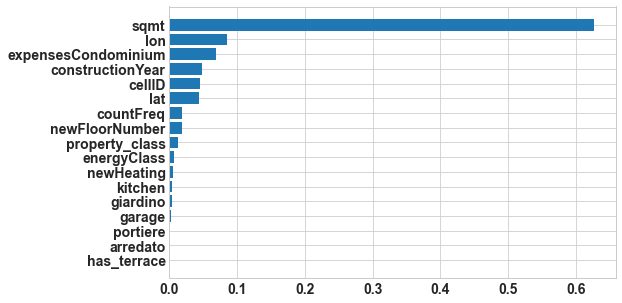

In [115]:
import matplotlib.pyplot as plt
print(forest_model.feature_importances_)
sorted_idx = forest_model.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], forest_model.feature_importances_[sorted_idx])


In [116]:
from sklearn.feature_extraction.text import CountVectorizer

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

y = milan_data.price
X = milan_data[house_features]

train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.25)


train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)

In [95]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000,learning_rate=0.05)
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [126]:
predictions = my_model.predict(test_X)

from sklearn.metrics import mean_absolute_error
#print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

r2val = "{:.10f}".format(r2_score(predictions, test_y))
#r2val = float(r2_score(predictions, test_y))
#print(r2val)


print("MAE:  %d" %mean_absolute_error(predictions, test_y))
#print("R2:  %d" r2val)
print("R2 unrounded: " + r2val)
print("MSE:  %d" %mean_squared_error(predictions, test_y))
print("RMSE:  %d" %math.sqrt(mean_squared_error(predictions, test_y)))


R2 unrounded: 0.9797299430
MAE:  37253
MSE:  8742454272
RMSE:  93501


In [97]:
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')


y = milan_data.price
X = milan_data[house_features]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,-3.85086435e+08,-4.08315503e+08
1,theta_1,sqmt,5.77938104e+03,6.26285587e+03
2,theta_2,constructionYear,-1.24431651e+04,-1.64131285e+03
3,theta_3,energyClass,-1.37676713e+05,-7.33229406e+03
4,theta_4,expensesCondominium,-3.39940794e-02,-3.39940778e-02
5,theta_5,newFloorNumber,3.16720662e+04,3.16720664e+04
6,theta_6,cellID,-2.09506394e+02,-2.09507295e+02
7,theta_7,kitchen,-2.90094021e+04,-2.90094023e+04
8,theta_8,newHeating,1.57018855e+05,1.57018856e+05
9,theta_9,has_terrace,2.43262067e+05,2.43262075e+05


In [98]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  1338672835493.228
R square obtain for normal equation method is : -3.390895019985602


In [99]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  100530384564.87846
R square obtain for scikit learn library is : 0.6702567241132772


In [129]:
from sklearn.metrics import mean_absolute_error
#print("Mean Absolute Error : " + str(mean_absolute_error(y_pred_sk, y_test)))

print("MAE:  %d" %mean_absolute_error(y_pred_sk, y_test))
#print("R2:  %d" %r2_score(y_pred_sk, y_test))
print("R2 unrounded: ", R_square_sk)
print("MSE:  %d" %mean_squared_error(y_pred_sk, y_test))
print("RMSE:  %d" %math.sqrt(mean_squared_error(y_pred_sk, y_test)))

MAE:  176137
R2 unrounded:  0.6702567241132772
MSE:  100530384564
RMSE:  317065
